In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import svm

# pd.set_option('display.max_rows', None)

In [3]:
df=pd.read_csv('dataset22.csv')

In [4]:
feature_weights = {
    'Throughput': 0.2,
    'Delay': 0.1,
    'Jitter': 0.1,
    'Packet Loss': 0.1,
    'Connected UE':0.1,
    '5G UE':0.2,
    'ResourceFactor':0.2
}

In [5]:
df.drop(['EnB Number'],axis=1,inplace=True)

In [6]:
df


,Throughput,Delay,Jitter,Packet Loss,Connected UE,5G UE,ResourceFactor
0,150.9260,2.085830,0.607000,0,27,6,0.555556
1,132.3790,0.494901,0.023477,0,38,12,0.447368
2,113.2520,0.311122,0.019222,2,46,11,0.456522
3,203.7220,0.005941,0.002383,0,29,9,0.655172
4,130.9930,1.691480,0.488600,0,40,11,0.550000
5,166.4100,0.024811,0.009208,0,39,17,0.589744
6,107.7600,0.026142,0.010017,0,60,11,0.500000
7,133.7370,0.841710,0.066875,0,41,13,0.390244
8,198.4190,0.768685,0.664250,0,25,8,0.600000
9,179.3090,0.585281,0.171261,0,24,8,0.541667


In [7]:
scaler = MinMaxScaler()
X= scaler.fit_transform(df)
X_df = pd.DataFrame(X, columns=df.columns)
X_df

,Throughput,Delay,Jitter,Packet Loss,Connected UE,5G UE,ResourceFactor
0,0.571573,1.000000,0.913502,0.0,0.112360,0.00,0.585860
1,0.440244,0.235090,0.031870,0.0,0.235955,0.24,0.202445
2,0.304808,0.146730,0.025442,1.0,0.325843,0.20,0.234887
3,0.945414,0.000000,0.000000,0.0,0.134831,0.12,0.938895
4,0.430430,0.810399,0.734614,0.0,0.258427,0.20,0.566169
5,0.681213,0.009073,0.010312,0.0,0.247191,0.44,0.707021
6,0.265920,0.009713,0.011533,0.0,0.483146,0.20,0.388971
7,0.449860,0.401834,0.097439,0.0,0.269663,0.28,0.000000
8,0.907864,0.366723,1.000000,0.0,0.089888,0.08,0.743367
9,0.772549,0.278544,0.255154,0.0,0.078652,0.08,0.536637


In [56]:
np.mean(df['Throughput'])

133.29810909090907

In [8]:
weighted_X = pd.DataFrame()

for column, weight in feature_weights.items():
    weighted_X[column + '_Weighted'] = X_df[column] * weight

In [9]:
weighted_X

,Throughput_Weighted,Delay_Weighted,Jitter_Weighted,Packet Loss_Weighted,Connected UE_Weighted,5G UE_Weighted,ResourceFactor_Weighted
0,0.114315,0.100000,0.091350,0.0,0.011236,0.000,0.117172
1,0.088049,0.023509,0.003187,0.0,0.023596,0.048,0.040489
2,0.060962,0.014673,0.002544,0.1,0.032584,0.040,0.046977
3,0.189083,0.000000,0.000000,0.0,0.013483,0.024,0.187779
4,0.086086,0.081040,0.073461,0.0,0.025843,0.040,0.113234
5,0.136243,0.000907,0.001031,0.0,0.024719,0.088,0.141404
6,0.053184,0.000971,0.001153,0.0,0.048315,0.040,0.077794
7,0.089972,0.040183,0.009744,0.0,0.026966,0.056,0.000000
8,0.181573,0.036672,0.100000,0.0,0.008989,0.016,0.148673
9,0.154510,0.027854,0.025515,0.0,0.007865,0.016,0.107327


In [10]:
list=[]
for i in range(len(weighted_X)):
    sum=0
    for j in range(len(weighted_X.columns)):
        sum+=weighted_X.iloc[i,j]
    list.append(sum)
score=np.array(list)

In [11]:
print(score)

[0.43407262 0.22682935 0.29774041 0.41434488 0.41966381 0.39230418
 0.22141748 0.2228655  0.49190738 0.33907213 0.29976724 0.22139386
 0.30443368 0.20414629 0.22441177 0.30116126 0.36747055 0.25369488
 0.26312609 0.51765971 0.25702531 0.50045295]


In [12]:
scaler=MinMaxScaler()
label=score.reshape(-1,1)
label=scaler.fit_transform(label)
print(label)

[[0.73338591]
 [0.07235118]
 [0.29853305]
 [0.6704612 ]
 [0.68742677]
 [0.60015895]
 [0.05508917]
 [0.05970784]
 [0.91785891]
 [0.43036704]
 [0.30499796]
 [0.05501384]
 [0.31988228]
 [0.        ]
 [0.06463993]
 [0.30944438]
 [0.52094823]
 [0.15804297]
 [0.1881253 ]
 [1.        ]
 [0.1686659 ]
 [0.94511635]]


In [13]:
label=(label).astype(float)

In [14]:
X_df=weighted_X
X_df['label']=label

In [15]:
X_df

,Throughput_Weighted,Delay_Weighted,Jitter_Weighted,Packet Loss_Weighted,Connected UE_Weighted,5G UE_Weighted,ResourceFactor_Weighted,label
0,0.114315,0.100000,0.091350,0.0,0.011236,0.000,0.117172,0.733386
1,0.088049,0.023509,0.003187,0.0,0.023596,0.048,0.040489,0.072351
2,0.060962,0.014673,0.002544,0.1,0.032584,0.040,0.046977,0.298533
3,0.189083,0.000000,0.000000,0.0,0.013483,0.024,0.187779,0.670461
4,0.086086,0.081040,0.073461,0.0,0.025843,0.040,0.113234,0.687427
5,0.136243,0.000907,0.001031,0.0,0.024719,0.088,0.141404,0.600159
6,0.053184,0.000971,0.001153,0.0,0.048315,0.040,0.077794,0.055089
7,0.089972,0.040183,0.009744,0.0,0.026966,0.056,0.000000,0.059708
8,0.181573,0.036672,0.100000,0.0,0.008989,0.016,0.148673,0.917859
9,0.154510,0.027854,0.025515,0.0,0.007865,0.016,0.107327,0.430367


In [16]:
# num_cols = X_df.columns[:-1]
# noise = np.random.normal(scale=0.05, size=X_df[num_cols].shape)
# X_df[num_cols] += noise


In [17]:
print(X_df['label'].value_counts())

label
0.733386    1
0.072351    1
0.168666    1
1.000000    1
0.188125    1
0.158043    1
0.520948    1
0.309444    1
0.064640    1
0.000000    1
0.319882    1
0.055014    1
0.304998    1
0.430367    1
0.917859    1
0.059708    1
0.055089    1
0.600159    1
0.687427    1
0.670461    1
0.298533    1
0.945116    1
Name: count, dtype: int64


In [18]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [19]:
X = X_df.drop(X_df.columns[-1], axis=1)  # All columns except the last 
y = X_df[X_df.columns[-1]]

In [20]:
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X,y)



In [21]:
X_resampled=X
y_resampled=y

In [22]:
augmented_dataX = pd.concat([X_resampled]*4, ignore_index=True) 
augmented_dataY=pd.concat([y_resampled]*4,ignore_index=True)

In [23]:
noise_level = 0.2
X_noise = augmented_dataX.copy()
for col in X_noise.columns:
    if col=='Packet Loss_Weighted':
        # X_noise[col]=np.random.normal(0,noise_level,size=len(X_noise[col]))*0.1
        np.random.normal(0, noise_level * X_noise[col].std(), size=len(X_noise[col]))
        print("he")
    else:    
        X_noise[col] += np.random.normal(0, noise_level * X_noise[col].std(), size=len(X_noise[col]))

he


In [24]:
X_noise=pd.concat([X_resampled,X_noise],ignore_index=True)
Y_final=pd.concat([y_resampled,augmented_dataY],ignore_index=True)

In [25]:
X_noise

,Throughput_Weighted,Delay_Weighted,Jitter_Weighted,Packet Loss_Weighted,Connected UE_Weighted,5G UE_Weighted,ResourceFactor_Weighted
0,0.114315,0.100000,0.091350,0.0,0.011236,0.000000,0.117172
1,0.088049,0.023509,0.003187,0.0,0.023596,0.048000,0.040489
2,0.060962,0.014673,0.002544,0.1,0.032584,0.040000,0.046977
3,0.189083,0.000000,0.000000,0.0,0.013483,0.024000,0.187779
4,0.086086,0.081040,0.073461,0.0,0.025843,0.040000,0.113234
...,...,...,...,...,...,...,...
105,0.018571,0.005364,-0.003877,0.0,0.049786,0.134019,0.059115
106,0.104952,0.046523,0.013137,0.0,0.022551,-0.020787,0.091029
107,0.039336,0.085028,0.045370,0.0,0.036473,0.096285,0.197532
108,0.027636,0.058576,0.031814,0.0,0.035972,0.102102,0.005585


In [26]:
scaler=MinMaxScaler()
X_final=scaler.fit_transform(X_noise)

In [27]:
X_final=pd.DataFrame(X_final,columns=X_noise.columns)

In [28]:
print(Y_final[:22])

0     0.733386
1     0.072351
2     0.298533
3     0.670461
4     0.687427
5     0.600159
6     0.055089
7     0.059708
8     0.917859
9     0.430367
10    0.304998
11    0.055014
12    0.319882
13    0.000000
14    0.064640
15    0.309444
16    0.520948
17    0.158043
18    0.188125
19    1.000000
20    0.168666
21    0.945116
Name: label, dtype: float64


In [29]:
X_final

,Throughput_Weighted,Delay_Weighted,Jitter_Weighted,Packet Loss_Weighted,Connected UE_Weighted,5G UE_Weighted,ResourceFactor_Weighted
0,0.577297,0.944402,0.889153,0.0,0.152289,0.089742,0.585840
1,0.452254,0.293464,0.117574,0.0,0.261503,0.296970,0.216560
2,0.323301,0.218270,0.111947,1.0,0.340932,0.262432,0.247806
3,0.933244,0.093404,0.089682,0.0,0.172146,0.193356,0.925860
4,0.442910,0.783051,0.732595,0.0,0.281360,0.262432,0.566875
...,...,...,...,...,...,...,...
105,0.121492,0.139054,0.055752,0.0,0.492932,0.668335,0.306256
106,0.532727,0.489310,0.204653,0.0,0.252271,0.000000,0.459946
107,0.220346,0.816993,0.486750,0.0,0.375296,0.505428,0.972828
108,0.164646,0.591886,0.368105,0.0,0.370866,0.530543,0.048474


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final,Y_final, test_size=0.3,random_state=311)


In [31]:
# classifier = RandomForestClassifier()
# classifier.fit(X_train, Y_train)
# Y_pred = classifier.predict(X_test)
# accuracy = accuracy_score(Y_test, Y_pred)
# print("Accuracy:", accuracy)

In [32]:
# precision = precision_score(Y_test, Y_pred)

# # Calculate recall
# recall = recall_score(Y_test, Y_pred)

# # Calculate F1-score
# f1 = f1_score(Y_test, Y_pred)

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)

In [33]:
# y_prob=classifier.predict_proba(X_final)

In [34]:
# print(y_prob[:22])

In [35]:
# svm_classifier = svm.SVC(kernel='linear',probability=True)  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# # Train the model
# svm_classifier.fit(X_train, Y_train)

# # Predict labels for test data
# Y_pred = svm_classifier.predict(X_test)

# # Evaluate model performance
# accuracy = accuracy_score(Y_test, Y_pred)
# print("Accuracy:", accuracy)

In [36]:
# precision = precision_score(Y_test, Y_pred)

# # Calculate recall
# recall = recall_score(Y_test, Y_pred)

# # Calculate F1-score
# f1 = f1_score(Y_test, Y_pred)

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)

In [37]:
# y_prob=np.array(svm_classifier.predict_proba(X_final))

In [38]:
# print((y_prob)[:22])

In [39]:
model=LinearRegression()
model.fit(X_train,Y_train)
Y=model.predict(X_test)

In [40]:
mse=mean_squared_error(Y_test,Y)
print(mse)
print(np.sqrt(mse))

0.0029135860546436547
0.05397764402642685


In [41]:
Y_final=model.predict(X_final)

In [42]:
print(np.mean(Y_final[:22]))

0.38603292971611847


In [43]:
print(Y_final[:22])

[0.74152774 0.07648029 0.26839528 0.65273658 0.69386801 0.57862615
 0.07485034 0.05086517 0.8807665  0.42036651 0.30858102 0.06702398
 0.29423327 0.00188705 0.08360507 0.32286377 0.5117777  0.15205227
 0.20603615 1.02698039 0.178913   0.90028822]


In [44]:
len(X_final)

110

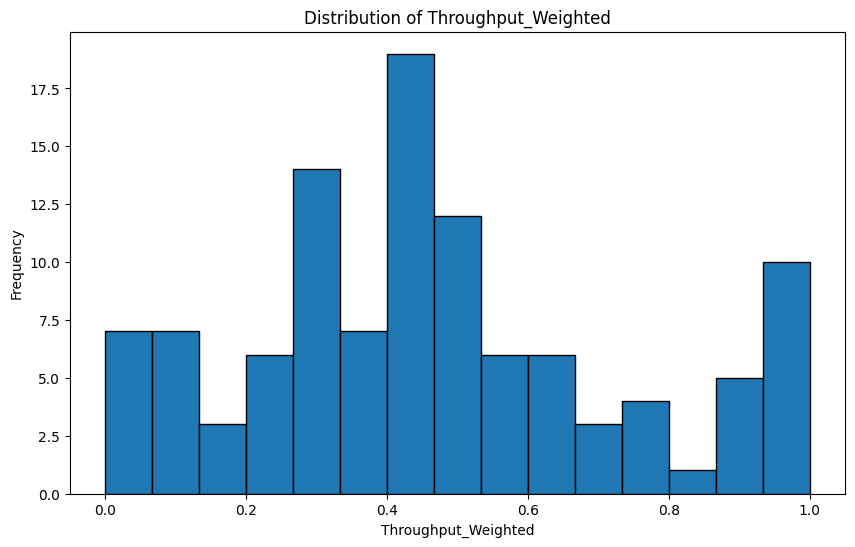

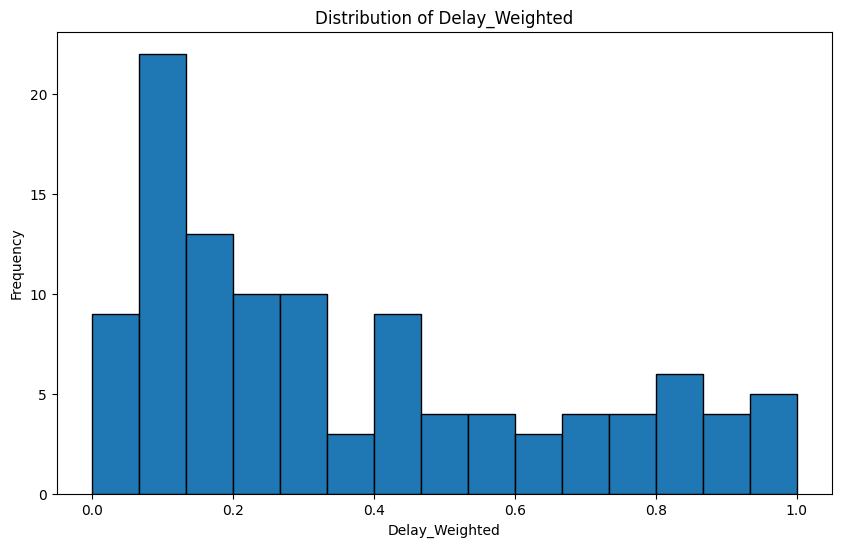

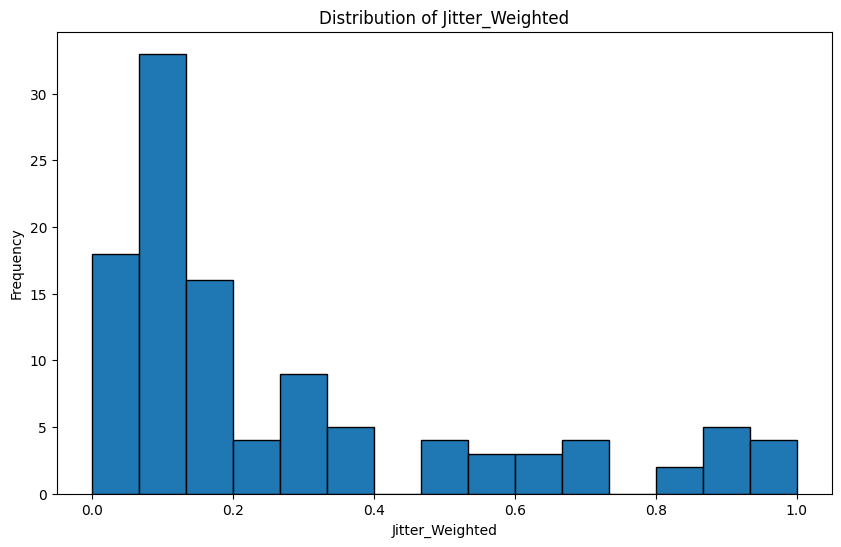

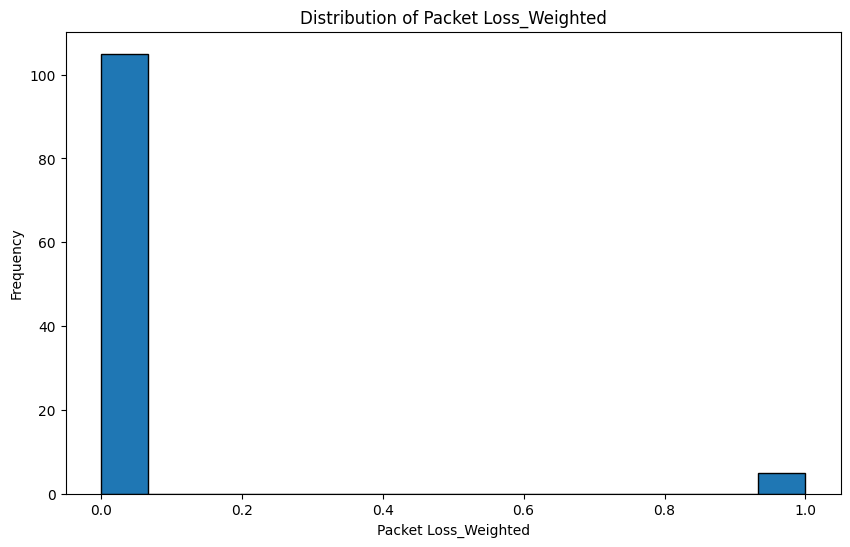

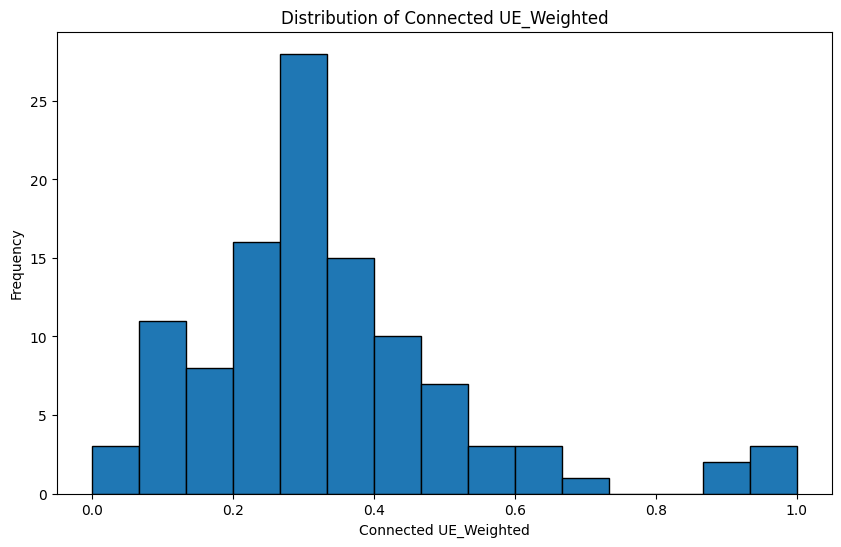

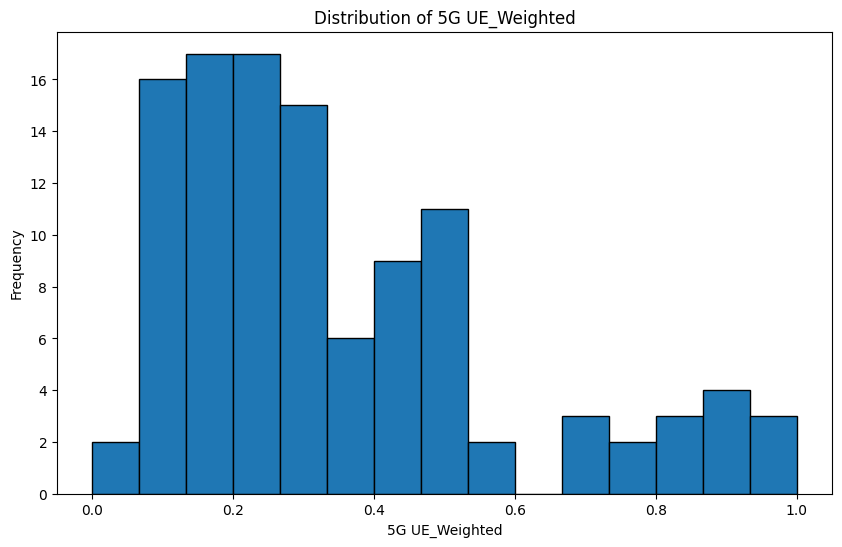

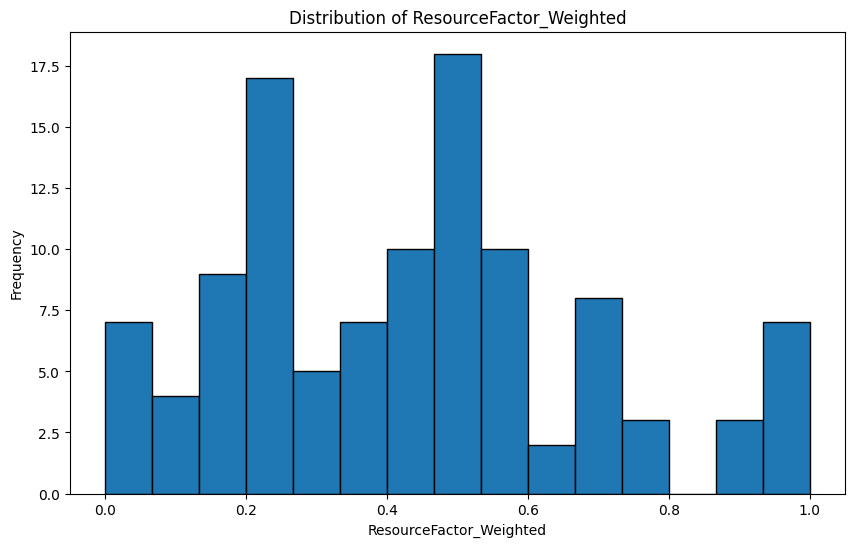

In [45]:


# Load the datase

# Plot the distribution of each column
for column in X_final.columns:
    plt.figure(figsize=(10, 6))
    

    # Plot histogram for numeric columns
    plt.hist(X_final[column], bins=15, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    
    plt.show()


In [54]:
np.mean(X_final['5G UE_Weighted'])

0.3510724813904516

In [48]:
X_final.columns

Index(['Throughput_Weighted', 'Delay_Weighted', 'Jitter_Weighted',
       'Packet Loss_Weighted', 'Connected UE_Weighted', '5G UE_Weighted',
       'ResourceFactor_Weighted'],
      dtype='object')